## E-learning company - Best Markets to Advertise in ##

We want to find which markets are most relevant for advertisement of our e-learning platform, with data analysis of freeCodeCamp 2017 survey rather than organizing a survey, which would be costly

The data set can be found <a href="https://github.com/freeCodeCamp/2017-new-coder-survey" target="_blank">here</a> for download. It covers information about each survey respondent, such as demographic and family situation, financial, professional field and development/coding experience, development and coding learning resources and practices (events, podcasts, bootcamps, youtube channels, budget).

The information that seem relevant for our analysis could be demgraphic (Age, Gender, Country of residence), the type of development job, the weekly learning hours and known learning resources

Let's get started

# Initial exploration

In [234]:
import pandas as pd

#the standard 
#survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv") returns a warning for which I found workarounds in notebooks shared by the community
survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", dtype={'CodeEventOther':'str', 'JobInterestOther': 'str'})

* Number of rows and columns

In [235]:
survey.shape

(18175, 136)

* first five rows, printing all columns

In [236]:
pd.options.display.max_columns=150
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [237]:
survey.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 136 columns):
Age                              15367 non-null float64
AttendedBootcamp                 17709 non-null float64
BootcampFinish                   1069 non-null float64
BootcampLoanYesNo                1079 non-null float64
BootcampName                     949 non-null object
BootcampRecommend                1073 non-null float64
ChildrenNumber                   2314 non-null float64
CityPopulation                   15354 non-null object
CodeEventConferences             1609 non-null float64
CodeEventDjangoGirls             165 non-null float64
CodeEventFCC                     1708 non-null float64
CodeEventGameJam                 290 non-null float64
CodeEventGirlDev                 297 non-null float64
CodeEventHackathons              1977 non-null float64
CodeEventMeetup                  2472 non-null float64
CodeEventNodeSchool              446 non-null float64
CodeEventNone 

### Columns of interest
*Which columns are relevant to understand the markets we want to target for our web and mobile development learning*

* Demographic data: Age, Gender, Country of residence
* Career and education data: Job, Employment status, Job of Interest, school degree,  University subjects
* Development learning data: Completed trainings/bootcamps, hours of learning, learning budget

In [238]:
focus_columns = survey.columns[survey.columns.str.startswith('JobInterest')].tolist()

type(focus_columns)
focus_columns += ['Age', 'Gender', 'CountryLive',
                  'EmploymentField', 'EmploymentStatus', 'FirstDevJob', 'MonthsProgramming', 'JobPref', 'JobRoleInterest',
                  'IsSoftwareDev', 'SchoolDegree',
                  'HoursLearning', 'MoneyForLearning']
print(focus_columns)

['JobInterestBackEnd', 'JobInterestDataEngr', 'JobInterestDataSci', 'JobInterestDevOps', 'JobInterestFrontEnd', 'JobInterestFullStack', 'JobInterestGameDev', 'JobInterestInfoSec', 'JobInterestMobile', 'JobInterestOther', 'JobInterestProjMngr', 'JobInterestQAEngr', 'JobInterestUX', 'Age', 'Gender', 'CountryLive', 'EmploymentField', 'EmploymentStatus', 'FirstDevJob', 'MonthsProgramming', 'JobPref', 'JobRoleInterest', 'IsSoftwareDev', 'SchoolDegree', 'HoursLearning', 'MoneyForLearning']


In [239]:
focus_survey = survey[focus_columns].copy()
print(focus_survey.shape)
focus_survey.sample(5)

(18175, 26)


,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,Age,Gender,CountryLive,EmploymentField,EmploymentStatus,FirstDevJob,MonthsProgramming,JobPref,JobRoleInterest,IsSoftwareDev,SchoolDegree,HoursLearning,MoneyForLearning
12336,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,work for a medium-sized company,NaN,0.0,NaN,168.0,0.0
16831,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,male,United States of America,software development and IT,Self-employed freelancer,NaN,36.0,work for a medium-sized company,Full-Stack Web Developer,0.0,"some college credit, no degree",20.0,100.0
7101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,male,United States of America,NaN,Employed for wages,NaN,0.0,start your own business,NaN,0.0,"some college credit, no degree",1.0,0.0
6680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,male,Russia,software development and IT,Employed for wages,0.0,24.0,NaN,NaN,1.0,high school diploma or equivalent (GED),4.0,800.0
5581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,female,United States of America,NaN,Not working but looking for work,NaN,1.0,start your own business,NaN,0.0,bachelor's degree,15.0,0.0


## Analysis of new coders ##

* Where are they located
* Locations with the greatest number of new coders
* How much are they willing to spend on learning

** Is the sample representative **

*How many surveys provide Job Interest information?*
*Sanity check on the null and non null values*

In [240]:
nb_interest_information = focus_survey['JobRoleInterest'].notnull().sum()
nb_no_interest_information = focus_survey['JobRoleInterest'].isna().sum()
print('Sanity check successful: ', focus_survey.shape[0] == (nb_interest_information + nb_no_interest_information))
JobRoleInterest_ResponseRate = round(nb_interest_information/focus_survey.shape[0], 2)
print('Job Role Interest Response Rate: ', JobRoleInterest_ResponseRate)

Sanity check successful:  True
Job Role Interest Response Rate:  0.38


* Default frequency distribution

In [241]:
JobInterestFrequencyDistribution = round(focus_survey['JobRoleInterest'].value_counts(normalize=True).sort_values(ascending=False)*100, 1)

In [242]:
print(JobInterestFrequencyDistribution)

Full-Stack Web Developer                                                                                                                                                                                                       11.8
  Front-End Web Developer                                                                                                                                                                                                       6.4
  Data Scientist                                                                                                                                                                                                                2.2
Back-End Web Developer                                                                                                                                                                                                          2.0
  Mobile Developer                                                                      

* Adjusted frequency distribution focused on non null values

In [243]:
JobInterestFrequencyDistribution_adjusted = round(JobInterestFrequencyDistribution * (1/JobRoleInterest_ResponseRate), 1)
print(JobInterestFrequencyDistribution_adjusted)

Full-Stack Web Developer                                                                                                                                                                                                       31.1
  Front-End Web Developer                                                                                                                                                                                                      16.8
  Data Scientist                                                                                                                                                                                                                5.8
Back-End Web Developer                                                                                                                                                                                                          5.3
  Mobile Developer                                                                      

* How many people are interested in more than one job role

In [249]:
NonNull_JobRoleInterest_survey = focus_survey[focus_survey['JobRoleInterest'].notnull()]
survey_JobRolesInterest = NonNull_JobRoleInterest_survey['JobRoleInterest'].str.split(',')
#survey_JobRolesInterest = survey_JobRolesInterest.str.strip()
for element in survey_JobRolesInterest:
    stripped = [s.strip() for s in element]
    element = stripped
survey_JobRolesInterest.sample(10)

1417     [Game Developer,    Front-End Web Developer,  ...
565      [Back-End Web Developer,  Information Security...
3974                           [  Front-End Web Developer]
13616    [  User Experience Designer,    Front-End Web ...
9777     [  Quality Assurance Engineer,  Information Se...
2676     [  Mobile Developer,  Back-End Web Developer, ...
12913                          [  Front-End Web Developer]
17239    [Game Developer,    Quality Assurance Engineer...
4138     [  Data Scientist,    Product Manager,    User...
15687                   [Data Engineer,    Data Scientist]
Name: JobRoleInterest, dtype: object

In [250]:
JobRolesOfInterest_dict = {}
interested_in_many_roles = 0
interested_in_one_or_less_role = 0
for element in survey_JobRolesInterest:
    print(element)
    if len(element) >= 2:
        interested_in_many_roles += 1
    else:
        interested_in_one_or_less_role +=1
    for job_role in element:
        if job_role in JobRolesOfInterest_dict:
            JobRolesOfInterest_dict[job_role] += 1
        else:
            JobRolesOfInterest_dict[job_role] = 1
        

['Full-Stack Web Developer']
['  Front-End Web Developer', ' Back-End Web Developer', '   DevOps / SysAdmin', '   Mobile Developer', ' Full-Stack Web Developer']
['  Front-End Web Developer', ' Full-Stack Web Developer', ' Back-End Web Developer']
['Full-Stack Web Developer', ' Information Security', '   Mobile Developer', '   Front-End Web Developer', ' Back-End Web Developer']
['Full-Stack Web Developer']
['Full-Stack Web Developer', '   Quality Assurance Engineer', ' Game Developer', ' Back-End Web Developer', '   User Experience Designer', '   Front-End Web Developer']
['  DevOps / SysAdmin', '   Data Scientist', ' Information Security', ' Data Engineer']
['Back-End Web Developer', ' Full-Stack Web Developer', '   Front-End Web Developer']
['Full-Stack Web Developer']
['Full-Stack Web Developer']
['Full-Stack Web Developer']
['Full-Stack Web Developer', '   Front-End Web Developer', '   User Experience Designer', ' Back-End Web Developer']
['  Front-End Web Developer', '   Mobile D

In [251]:
print('respondents interested in many roles: ', interested_in_many_roles)
print('respondents interested in one or less role: ', interested_in_one_or_less_role)

respondents interested in many roles:  4779
respondents interested in one or less role:  2213


In [252]:
nb_interests_in_web_or_mobile = 0

import re

for element in survey_JobRolesInterest:
    for job_role in element:
        if(re.search('web', job_role, re.IGNORECASE) or re.search('mobile', job_role, re.IGNORECASE)):
            nb_interests_in_web_or_mobile += 1
        break

In [253]:
#nb_interests_in_web_or_mobile = 0

#import re
#for key in JobRolesOfInterest_dict.keys():
#   if(re.search('web', key, re.IGNORECASE) or re.search('mobile', key, re.IGNORECASE)):
#      print(key)
#        nb_interests_in_web_or_mobile += 

In [254]:
print("number of respondents interested in web or mobile development job roles: ", nb_interests_in_web_or_mobile)
print("minimum percentage of respondents interested in Web or Mobile development: ", round(nb_interests_in_web_or_mobile/focus_survey[focus_survey['JobRoleInterest'].notnull()].shape[0]*100, 1), "%")

number of respondents interested in web or mobile development job roles:  4303
minimum percentage of respondents interested in Web or Mobile development:  61.5 %


Out of all meaningful answers, 61.5% have interest in Web or Mobile development, and this is a minimum percentage, as non null answers are not all meaningful, eg "Not decided". We should try to address that issue.

** There is some cleaning to be done on the Job Roles of Interest information **

In [255]:
#For some reason the below didn't work
#sorted_JobRolesOfInterest_dict = dict(sorted(JobRolesOfInterest_dict.items(),
#                                            key = lambda item: item[1],
#                                           reverse = True))
import operator
sorted_JobRolesOfInterest_dict = sorted(JobRolesOfInterest_dict.items(),
                                        key=operator.itemgetter(1),
                                        reverse=True)
for element in sorted_JobRolesOfInterest_dict:
    print(element)

(' Full-Stack Web Developer', 2490)
('   Front-End Web Developer', 2287)
(' Back-End Web Developer', 1997)
('   Mobile Developer', 1734)
('Full-Stack Web Developer', 1708)
('  Front-End Web Developer', 1246)
(' Game Developer', 1162)
('   Data Scientist', 1120)
('   User Experience Designer', 1078)
(' Information Security', 986)
(' Data Engineer', 944)
('Back-End Web Developer', 775)
('   DevOps / SysAdmin', 695)
('   Product Manager', 600)
('  Mobile Developer', 570)
('  Data Scientist', 523)
('Game Developer', 466)
('  User Experience Designer', 391)
('   Quality Assurance Engineer', 389)
('Information Security', 340)
('Data Engineer', 304)
('  DevOps / SysAdmin', 232)
('  Product Manager', 214)
('  Quality Assurance Engineer', 109)
(' Software Engineer', 6)
('Software Engineer', 5)
('Software Developer', 4)
(' Desktop Application Developer', 3)
(' Software engineer', 2)
(' Software Developer', 2)
('Not sure', 2)
(' Business Analyst', 2)
('Not sure yet', 2)
('Artificial Intelligence'

One can observe a long list of answers with one single answer, which we call the long tail. On the opposite, there is a relatively small subset of answers which captures the vast majority of answers. Let's try to quantify this to understand how we can simplify and clean the answers.

*We first look at how many different answers there are to the job roles of interest question*

In [256]:
len(sorted_JobRolesOfInterest_dict)

236

*How much information would we lose if we'd focus on answers with more than 10 instances ? 

In [257]:
nb_selected_answers = 0
nb_ignored_answers = 0
selected_JobRoles_dict = {}
for element in sorted_JobRolesOfInterest_dict:
    if (element[1] > 10):
        nb_selected_answers += element[1]
        selected_JobRoles_dict[element[0]] = element[1]
    else:
        nb_ignored_answers += element[1]

print("number of potentially selected answers: ", nb_selected_answers)
print("number of potentially ignored answers: ", nb_ignored_answers)
print("potential information loss percentage: ", round(nb_ignored_answers/(nb_selected_answers+nb_ignored_answers)*100, 1), "%")
print("number of remaining job roles of interest: ", len(selected_JobRoles_dict))

number of potentially selected answers:  22360
number of potentially ignored answers:  240
potential information loss percentage:  1.1 %
number of remaining job roles of interest:  24


There is a long tail of Job Roles which may or may not be relevant.
We can remove this long tail at a cost of 1.1% of information loss, at most, given the discarded information also includes not meaningful information.
We capture 98.9% of Job Roles Interest answers with 24 Job Roles.
We still need to verify that those 24 Job Roles of Interest answers are meaningful

In [207]:
print(selected_JobRoles_dict)

{'Back-End Web Developer': 775, 'Information Security': 340, '  Quality Assurance Engineer': 109, '   Data Scientist': 1120, '   DevOps / SysAdmin': 695, 'Game Developer': 466, ' Full-Stack Web Developer': 2490, ' Back-End Web Developer': 1997, ' Data Engineer': 944, 'Data Engineer': 304, ' Game Developer': 1162, '  Front-End Web Developer': 1246, '   User Experience Designer': 1078, '   Front-End Web Developer': 2287, 'Full-Stack Web Developer': 1708, '   Mobile Developer': 1734, '  DevOps / SysAdmin': 232, ' Information Security': 986, '  User Experience Designer': 391, '  Mobile Developer': 570, '   Quality Assurance Engineer': 389, '   Product Manager': 600, '  Data Scientist': 523, '  Product Manager': 214}


We confirm that the 24 remaining Job Roles of Interest are meaningful

In [279]:
cleaned_jobRoles_dict = {}
for item in selected_JobRoles_dict:
    if item.strip() in cleaned_jobRoles_dict:
        #we add the percentage of answers with the job role of interest, thus the normalization versus the nb of selected answers
        cleaned_jobRoles_dict[item.strip()] += round(selected_JobRoles_dict[item]/nb_selected_answers*100)
    else:
        cleaned_jobRoles_dict[item.strip()] = round(selected_JobRoles_dict[item]/nb_selected_answers*100)

import operator
sorted_jobRoles_interestPercentages = dict(sorted(cleaned_jobRoles_dict.items(), key=operator.itemgetter(1), reverse=True))
print(sorted_jobRoles_interestPercentages)
print("remaining number of Job Roles Interests: ", len(sorted_jobRoles_interestPercentages))
    



{'Back-End Web Developer': 12, 'Quality Assurance Engineer': 2, 'Information Security': 6, 'Full-Stack Web Developer': 19, 'Game Developer': 7, 'Mobile Developer': 11, 'User Experience Designer': 7, 'DevOps / SysAdmin': 4, 'Data Engineer': 5, 'Data Scientist': 7, 'Front-End Web Developer': 16, 'Product Manager': 4}
remaining number of Job Roles Interests:  12


**Let's vsualize this graphically**

In [280]:
sorted_jobRoles_interestPercentages.items()

dict_items([('Back-End Web Developer', 12), ('Quality Assurance Engineer', 2), ('Information Security', 6), ('Full-Stack Web Developer', 19), ('Game Developer', 7), ('Mobile Developer', 11), ('User Experience Designer', 7), ('DevOps / SysAdmin', 4), ('Data Engineer', 5), ('Data Scientist', 7), ('Front-End Web Developer', 16), ('Product Manager', 4)])

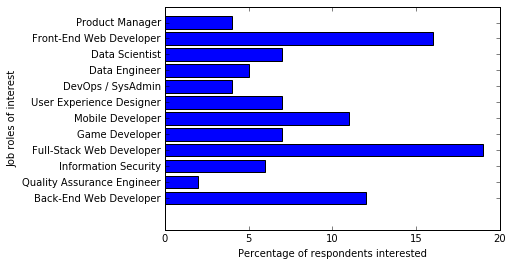

In [307]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.barh(range(len(sorted_jobRoles_interestPercentages)),
         sorted_jobRoles_interestPercentages.values(),
         align='center')
plt.yticks(range(len(sorted_jobRoles_interestPercentages)), list(sorted_jobRoles_interestPercentages.keys()))
plt.xlabel('Percentage of respondents interested')
plt.ylabel('Job roles of interest')

plt.show()

#Pending tasks: sorting the bars in value descending order and displaying the values for each bar


### Another pending task is to analyze the JobInterest columns ###

Looking at notebooks from community coders, this additional analysis is consistent with our findings

# Geographic market analysis - Countries #

In [310]:
NonNull_JobRoleInterest_survey['CountryLive'].isnull().sum()

154

In [319]:
#Let us drop the rows with missing country information

Country_Job_survey_data = NonNull_JobRoleInterest_survey[NonNull_JobRoleInterest_survey['CountryLive'].notnull()].copy()


In [320]:
#Sanity check on restricted data set: CountryLive should have no null values 
print("Sanity check on restricted data set successful: ",
      Country_Job_survey_data['CountryLive'].isnull().sum() == 0)



Sanity check on restricted data set successful:  True


In [321]:
Country_Job_survey_data['CountryLive'].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Croatia     

In [322]:
Country_Job_survey_data['CountryLive'].value_counts(normalize=True)*100

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Serbia                            0.760456
Philippines                       0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Singapore  

** The 2 markets that dominate in terms of responses and Job Role of Interest responses are the US and India, however... **

* We are assuming that the markets are equally easy to get in. One should assess the need for training, and willigness to pay, in those markets
* Is our training equally suited for all markets?
* How have the previous data filtering steps influenced this result? We can expect that the US would still appear as a top market anyway, but India appears fairly close to UK and Canada


## Willigness to pay analysis ##

** Monthly learning budget analysis **

In [324]:
Country_Job_survey_data['MonthsProgramming'] = Country_Job_survey_data['MonthsProgramming'].apply(lambda x: max(1, x))

In [327]:
#Sanity check
print("sanity check successful: ", Country_Job_survey_data['MonthsProgramming'].min() == 1)

sanity check successful:  True


In [328]:
Country_Job_survey_data['MonthlyLearningBudget'] = Country_Job_survey_data['MoneyForLearning']/Country_Job_survey_data['MonthsProgramming']

In [329]:
#How many null values in the created column?

Country_Job_survey_data['MonthlyLearningBudget'].isnull().sum()

476

In [331]:
NonNull_CountryJob_survey_data = Country_Job_survey_data[Country_Job_survey_data['MonthlyLearningBudget'].notnull()].copy() 

** Analysis by Country **

In [337]:
country_list = ['US', 'India', 'UK', 'Canada']
TopCountry_Job_survey_data = NonNull_CountryJob_survey_data[(NonNull_CountryJob_survey_data['CountryLive'] == 'United States of America') |
                                                            (NonNull_CountryJob_survey_data['CountryLive'] == 'India') |
                                                            (NonNull_CountryJob_survey_data['CountryLive'] == 'United Kingdom') |
                                                            (NonNull_CountryJob_survey_data['CountryLive'] == 'Canada')].copy()
GroupedCountry_survey = TopCountry_Job_survey_data.groupby('CountryLive')

In [338]:
GroupedCountry_survey['MonthlyLearningBudget'].describe()

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
Canada,244.0,132.223896,537.907812,0.0,0.0,0.000000,25.0,5000.0
India,469.0,134.054914,688.697835,0.0,0.0,0.000000,13.0,10000.0
United Kingdom,286.0,44.419964,160.461015,0.0,0.0,0.000000,20.0,1400.0
United States of America,3008.0,237.153631,1952.846140,0.0,0.0,3.333333,50.0,80000.0


(0, 200)

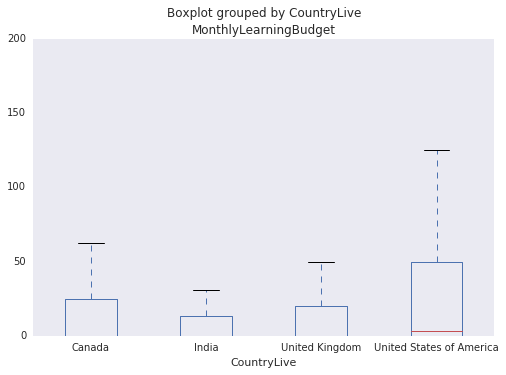

In [342]:
import seaborn as sns

TopCountry_Job_survey_data.boxplot(by='CountryLive', column='MonthlyLearningBudget', grid=False)
plt.ylim([0,200])

**Distorsion of monthly budget analysis due to....**

* Results for Canada and UK seem low, in comparison to country's wealth
* Many null values. What should we do abouyt it ??
* A number of outliers/very high values. Can we remove them without losing significant information?

In [346]:
TopCountry_Job_survey_data['MoneyForLearning'].value_counts().sort_index(ascending=False)


200000.0       1
120000.0       1
100000.0       2
80000.0        1
70000.0        1
69000.0        1
65000.0        1
50000.0        1
45000.0        1
35000.0        1
30000.0        2
25000.0        4
24500.0        1
22000.0        1
21000.0        1
20000.0       17
19000.0        2
18000.0        5
17000.0        2
16500.0        1
16000.0        8
15100.0        1
15000.0       16
14023.0        1
14000.0        9
13900.0        1
13000.0        6
12500.0        2
12000.0       10
11000.0       10
            ... 
50.0         141
46.0           1
45.0           6
42.0           2
40.0          37
39.0           2
36.0           1
35.0          10
30.0          53
29.0           2
28.0           1
25.0          21
24.0           1
23.0           1
22.0           3
20.0          78
19.0           1
18.0           1
15.0          30
13.0           1
12.0           1
10.0          30
8.0            2
6.0            1
5.0           12
4.0            1
3.0            1
2.0           

In [348]:
len(TopCountry_Job_survey_data['MoneyForLearning'])

4007

**We could consider any monthly budget above $10000 as an outlier and lose less than 5% information**

In [356]:
Cleaned_TopCountry_survey = TopCountry_Job_survey_data[TopCountry_Job_survey_data['MoneyForLearning'] < 10000].copy()

In [357]:
CleanedGroupedCountry_survey = Cleaned_TopCountry_survey.groupby('CountryLive')
CleanedGroupedCountry_survey['MonthlyLearningBudget'].describe()

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
Canada,238.0,89.135936,397.955922,0.0,0.0,0.000000,20.625000,5000.0
India,461.0,77.812917,386.987706,0.0,0.0,0.000000,12.500000,5000.0
United Kingdom,284.0,39.247948,143.255593,0.0,0.0,0.000000,20.000000,1400.0
United States of America,2888.0,94.128070,414.342294,0.0,0.0,2.083333,33.333333,9000.0


** At this point and without further digging into the odd values for monthly budget, US and India appear as best countries to advertise in**

* US choice is based on its highest monthly budget figures and big market size, judging by the number of respondents
* While India 